In [1]:
# Import 2024 NYISO Data, EDA, Cleaning

In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))
import pandas as pd
import matplotlib.pyplot as plt

from src.data_loader import load_and_clean_lbmp, combine_price_series, summarize_prices
from src.report_utils import save_figure, save_dataframe, export_summary_report

DATA_DIR = "../data/nyiso"
OUTPUT_DIR = "../outputs"

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
# Call data from the data/nyiso folder
dam_path = os.path.join(DATA_DIR, "OASIS_Day-Ahead_Market_Zonal_LBMP_West.csv")
rtd_path = os.path.join(DATA_DIR, "OASIS_Real_Time_Dispatch_Zonal_LBMP.csv")

dam_df = load_and_clean_lbmp(dam_path, time_col="Eastern Date Hour", price_col="DAM Zonal LBMP")
rtd_df = load_and_clean_lbmp(rtd_path, time_col="RTD End Time Stamp", price_col="RTD Zonal LBMP")

In [4]:
prices = combine_price_series(dam_df, rtd_df)
stats = summarize_prices(prices)

print("=== Annual Summary ===")
display(stats["annual_summary"])
print(f"\nCorrelation (DAM vs RTD): {stats['correlation']:.3f}")
#print(prices[['DAM_LBMP', 'RTD_LBMP']].describe())

=== Annual Summary ===


,Zone PTID,DAM_LBMP,DAM Zonal Losses,DAM Zonal Congestion,DAM Zonal Price Version,Zone PTID,RTD_LBMP,RTD Zonal Losses,RTD Zonal Congestion,RTD Zonal Price Version
count,8784.0,8784.000000,8784.000000,8784.000000,8784.0,8783.0,8783.000000,8783.000000,8783.000000,8783.000000
mean,61752.0,32.654796,-1.366206,-0.187049,1.0,61752.0,31.776905,-1.293742,0.517967,1.000114
std,0.0,17.214083,2.139220,1.373685,0.0,0.0,28.311076,2.414784,4.012407,0.010670
min,61752.0,12.990000,-21.260000,-28.450000,1.0,61752.0,-25.050000,-78.910000,-92.260000,1.000000
25%,61752.0,22.760000,-2.070000,0.000000,1.0,61752.0,20.825000,-1.780000,0.000000,1.000000
50%,61752.0,27.830000,-0.940000,0.000000,1.0,61752.0,26.310000,-0.940000,0.000000,1.000000
75%,61752.0,35.860000,-0.200000,0.000000,1.0,61752.0,35.330000,-0.280000,0.000000,1.000000
max,61752.0,215.000000,10.830000,15.220000,1.0,61752.0,908.670000,34.540000,84.630000,2.000000



Correlation (DAM vs RTD): 0.512


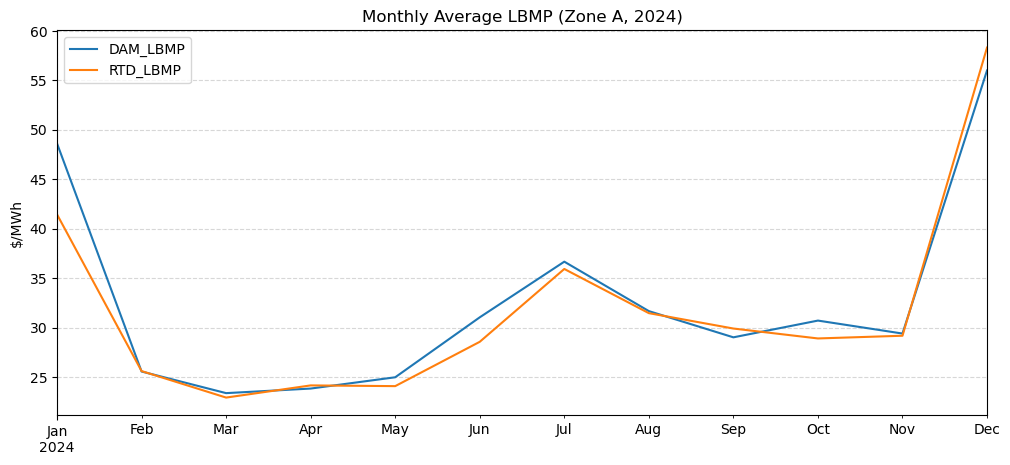

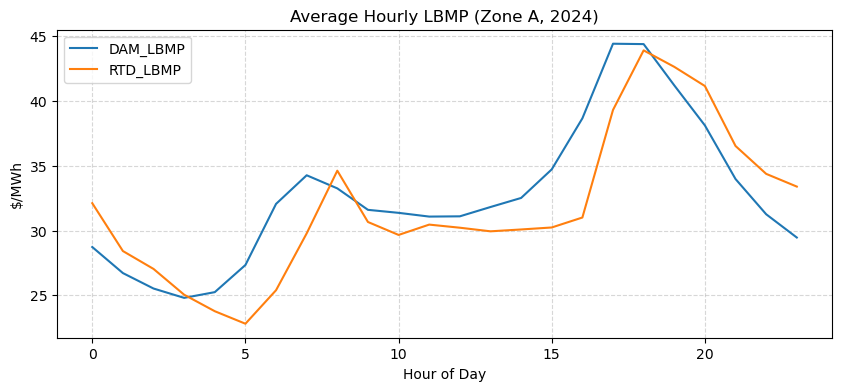

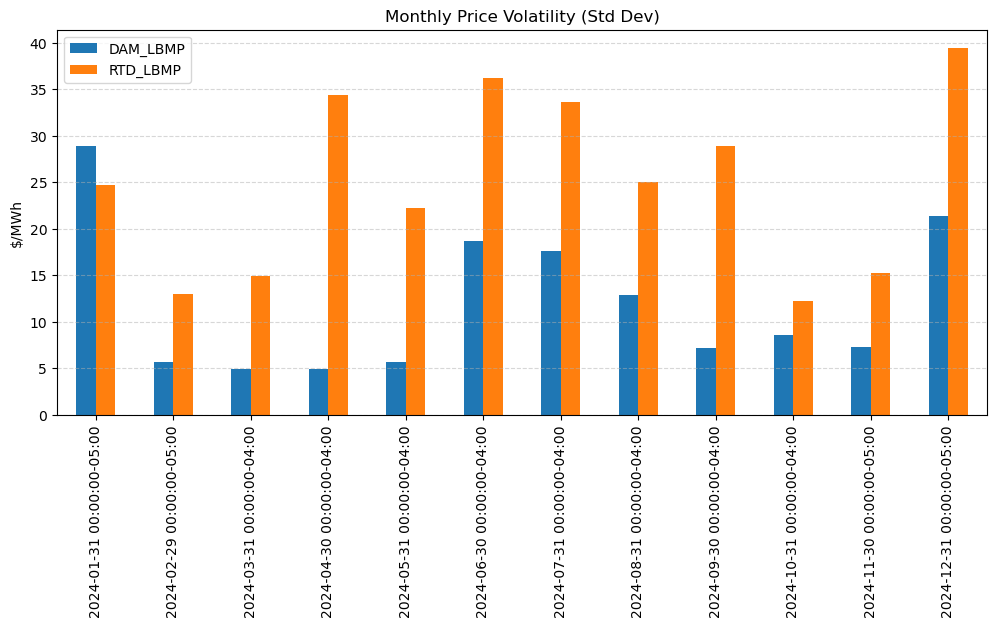

In [5]:
# Monthly averages
monthly_stats = prices.resample("ME").mean()
monthly_stats[['DAM_LBMP', 'RTD_LBMP']].plot(figsize=(12,5))
plt.title("Monthly Average LBMP (Zone A, 2024)")
plt.ylabel("$/MWh")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Hourly average profile
hourly_stats = prices.groupby(prices.index.hour).mean()
hourly_stats[['DAM_LBMP', 'RTD_LBMP']].plot(figsize=(10,4))
plt.title("Average Hourly LBMP (Zone A, 2024)")
plt.xlabel("Hour of Day")
plt.ylabel("$/MWh")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Monthly volatility
monthly_vol = prices.resample("ME").std()
monthly_vol[['DAM_LBMP', 'RTD_LBMP']].plot(kind='bar', figsize=(12,5))
plt.title("Monthly Price Volatility (Std Dev)")
plt.ylabel("$/MWh")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [6]:
### Export Section ###
# 1. Monthly average figure
fig1, ax1 = plt.subplots(figsize=(12,5))
monthly_stats[['DAM_LBMP','RTD_LBMP']].plot(ax=ax1)
ax1.set_title("Monthly Average LBMP (Zone A, 2024)")
ax1.set_ylabel("$/MWh")
ax1.grid(True, linestyle='--', alpha=0.5)
save_figure(fig1, "monthly_avg_LBMP.png")

# 2. Hourly average figure
fig2, ax2 = plt.subplots(figsize=(10,4))
hourly_stats[['DAM_LBMP','RTD_LBMP']].plot(ax=ax2)
ax2.set_title("Average Hourly LBMP (Zone A, 2024)")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("$/MWh")
ax2.grid(True, linestyle='--', alpha=0.5)
save_figure(fig2, "hourly_profile_LBMP.png")

# 3. Monthly volatility figure
fig3, ax3 = plt.subplots(figsize=(12,5))
monthly_vol[['DAM_LBMP','RTD_LBMP']].plot(kind='bar', ax=ax3)
ax3.set_title("Monthly Price Volatility (Std Dev)")
ax3.set_ylabel("$/MWh")
ax3.grid(True, axis='y', linestyle='--', alpha=0.5)
save_figure(fig3, "monthly_volatility_LBMP.png")

# 4. Summary CSV export
cleaned_path = os.path.join(OUTPUT_DIR, "lbmp_zoneA_cleaned.csv")
prices.to_csv(cleaned_path)
print(f"Cleaned LBMP file saved to: {cleaned_path}")
export_summary_report(prices, monthly_stats, hourly_stats, monthly_vol)
print("All figures and summary report exported to /outputs/")

Cleaned LBMP file saved to: ../outputs\lbmp_zoneA_cleaned.csv
Saved DataFrame → lbmp_summary.csv
All figures and summary report exported to /outputs/
